In [ ]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import ast

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

df['job_skills']=df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_pak_DA = df[(df['job_country']=='Pakistan')&(df['job_title_short']=='Data Analyst')].copy()

In [3]:
df_pak_DA['month_no']=df_pak_DA['job_posted_date'].dt.month

In [4]:
df_pak_DA=df_pak_DA.explode('job_skills')

In [5]:
df_pak_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month_no
13380,Data Analyst,Manager Research & Data Analytics,"Karachi, Pakistan",via LinkedIn,Full-time,False,Pakistan,2023-09-13 13:14:15,False,False,Pakistan,None,NaN,NaN,K-Electric,excel,"{'analyst_tools': ['excel', 'sap']}",9
13380,Data Analyst,Manager Research & Data Analytics,"Karachi, Pakistan",via LinkedIn,Full-time,False,Pakistan,2023-09-13 13:14:15,False,False,Pakistan,None,NaN,NaN,K-Electric,sap,"{'analyst_tools': ['excel', 'sap']}",9
13941,Data Analyst,Data Analyst,Pakistan,via Trabajo.org,Full-time,False,Pakistan,2023-02-28 13:15:04,False,False,Pakistan,None,NaN,NaN,S&P Global,sql,"{'programming': ['sql', 'vba']}",2
13941,Data Analyst,Data Analyst,Pakistan,via Trabajo.org,Full-time,False,Pakistan,2023-02-28 13:15:04,False,False,Pakistan,None,NaN,NaN,S&P Global,vba,"{'programming': ['sql', 'vba']}",2
17263,Data Analyst,Junior Data Analyst,"Karachi, Pakistan",via Indeed,Full-time,False,Pakistan,2023-12-21 13:39:19,True,False,Pakistan,None,NaN,NaN,Service Industry - Marketing & Events,sql,"{'analyst_tools': ['excel'], 'cloud': ['azure'...",12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783302,Data Analyst,Data Analyst,Anywhere,via LinkedIn Pakistan,Full-time,True,Pakistan,2023-01-16 06:16:53,True,False,Pakistan,None,NaN,NaN,HR Ways - Hiring Tech Talent,tableau,"{'analyst_tools': ['tableau'], 'programming': ...",1
784501,Data Analyst,Data Analyst,Anywhere,via LinkedIn,Full-time,True,Pakistan,2023-09-28 06:16:17,False,False,Pakistan,None,NaN,NaN,flowershop.ae,sql,"{'analyst_tools': ['excel', 'sheets'], 'progra...",9
784501,Data Analyst,Data Analyst,Anywhere,via LinkedIn,Full-time,True,Pakistan,2023-09-28 06:16:17,False,False,Pakistan,None,NaN,NaN,flowershop.ae,python,"{'analyst_tools': ['excel', 'sheets'], 'progra...",9
784501,Data Analyst,Data Analyst,Anywhere,via LinkedIn,Full-time,True,Pakistan,2023-09-28 06:16:17,False,False,Pakistan,None,NaN,NaN,flowershop.ae,excel,"{'analyst_tools': ['excel', 'sheets'], 'progra...",9


In [6]:
df_DA_pivot = df_pak_DA.pivot_table(index='month_no',columns='job_skills',aggfunc='size',
                                    fill_value=0)

In [7]:
df_DA_pivot

job_skills,airflow,alteryx,aws,azure,bigquery,c,c++,confluence,css,databricks,...,ssis,t-sql,tableau,tensorflow,terraform,unix,vba,visio,windows,word
month_no,,,,,,,,,,,,,,,,,,,,,
1,2,1,3,2,2,0,1,1,1,1,...,0,0,12,0,0,1,2,0,0,0
2,0,1,1,1,0,0,1,0,0,0,...,0,0,3,0,0,0,2,0,0,0
3,1,0,0,0,1,0,2,0,0,0,...,0,0,4,0,0,0,0,0,0,1
4,0,2,2,0,0,0,0,0,0,0,...,0,0,6,0,0,1,0,1,1,1
5,0,0,0,0,1,0,0,0,0,0,...,0,0,3,0,0,0,0,0,1,2
6,0,0,1,1,0,1,0,0,0,0,...,0,0,4,0,0,0,1,0,0,0
7,1,2,0,0,1,0,0,0,0,0,...,1,0,5,0,0,0,0,2,0,1
8,2,1,3,2,1,0,0,0,0,0,...,0,0,12,1,1,0,0,0,1,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,6,0,0,0,0,0,0,3


In [8]:
df_DA_pivot.loc['Total']=df_DA_pivot.sum()

In [9]:
df_DA_pivot=df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot=df_DA_pivot.drop('Total')

In [10]:
df_DA=df_pak_DA.groupby('month_no').size()
df_DA

month_no
1     125
2      49
3      72
4      68
5      32
6      42
7      50
8     102
9      82
10     97
11     40
12     88
dtype: int64

In [11]:
df_DA_pak_percent =df_DA_pivot.div(df_DA/100,axis=0)
df_DA_pak_percent

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,go,azure,...,html,kafka,slack,seaborn,scikit-learn,pyspark,t-sql,splunk,terraform,tensorflow
month_no,,,,,,,,,,,,,,,,,,,,,
1,13.600000,4.800000,8.000000,9.600000,2.400000,4.000000,4.800000,0.800000,2.400000,1.600000,...,0.8,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,20.408163,8.163265,10.204082,6.122449,6.122449,4.081633,0.000000,0.000000,0.000000,2.040816,...,0.0,0.000000,2.040816,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,12.500000,12.500000,6.944444,5.555556,1.388889,4.166667,2.777778,2.777778,1.388889,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,14.705882,13.235294,5.882353,8.823529,2.941176,2.941176,2.941176,8.823529,2.941176,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.470588,0.000000,0.000000
5,12.500000,9.375000,9.375000,9.375000,0.000000,3.125000,0.000000,3.125000,3.125000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
6,14.285714,9.523810,9.523810,9.523810,4.761905,4.761905,0.000000,0.000000,4.761905,2.380952,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
7,16.000000,8.000000,10.000000,10.000000,6.000000,2.000000,0.000000,4.000000,4.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
8,14.705882,2.941176,10.784314,11.764706,8.823529,5.882353,1.960784,0.980392,0.000000,1.960784,...,0.0,0.980392,0.000000,0.000000,0.980392,0.000000,0.0,0.000000,0.980392,0.980392
9,10.975610,13.414634,12.195122,7.317073,3.658537,8.536585,2.439024,1.219512,2.439024,1.219512,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [12]:
df_DA_pak_percent.reset_index(inplace=True)
df_DA_pak_percent['job_posted_month'] = df_DA_pak_percent['month_no'].apply(
      lambda m:pd.to_datetime(str(m),format='%m').strftime(format='%b'))
df_DA_pak_percent.drop(columns='month_no',inplace=True)
df_DA_pak_percent.set_index('job_posted_month',inplace=True)

df_DA_pak_percent

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,go,azure,...,html,kafka,slack,seaborn,scikit-learn,pyspark,t-sql,splunk,terraform,tensorflow
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,13.600000,4.800000,8.000000,9.600000,2.400000,4.000000,4.800000,0.800000,2.400000,1.600000,...,0.8,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Feb,20.408163,8.163265,10.204082,6.122449,6.122449,4.081633,0.000000,0.000000,0.000000,2.040816,...,0.0,0.000000,2.040816,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Mar,12.500000,12.500000,6.944444,5.555556,1.388889,4.166667,2.777778,2.777778,1.388889,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Apr,14.705882,13.235294,5.882353,8.823529,2.941176,2.941176,2.941176,8.823529,2.941176,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.470588,0.000000,0.000000
May,12.500000,9.375000,9.375000,9.375000,0.000000,3.125000,0.000000,3.125000,3.125000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Jun,14.285714,9.523810,9.523810,9.523810,4.761905,4.761905,0.000000,0.000000,4.761905,2.380952,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Jul,16.000000,8.000000,10.000000,10.000000,6.000000,2.000000,0.000000,4.000000,4.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Aug,14.705882,2.941176,10.784314,11.764706,8.823529,5.882353,1.960784,0.980392,0.000000,1.960784,...,0.0,0.980392,0.000000,0.000000,0.980392,0.000000,0.0,0.000000,0.980392,0.980392
Sep,10.975610,13.414634,12.195122,7.317073,3.658537,8.536585,2.439024,1.219512,2.439024,1.219512,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


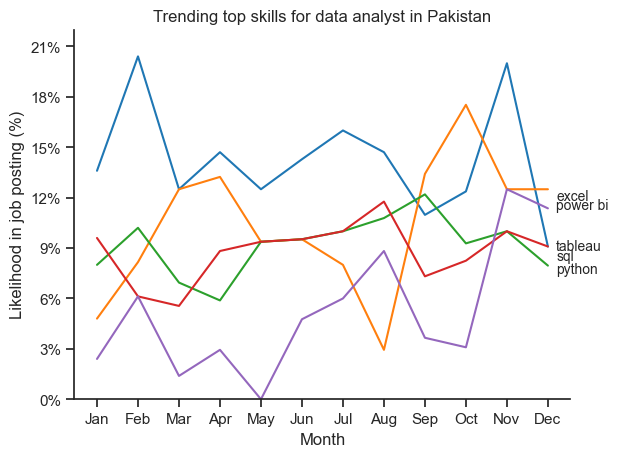

In [13]:
from matplotlib.ticker import MaxNLocator, PercentFormatter

df_plot = df_DA_pak_percent.iloc[:, :5]

sns.set_theme(style='ticks')
sns.lineplot(data=df_plot, dashes=False, palette='tab10')

plt.title('Trending top skills for data analyst in Pakistan')
plt.xlabel('Month')
plt.ylabel('Likelihood in job posting (%)')
plt.ylim(0, 22)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Format y-axis as percentages
plt.gca().yaxis.set_major_formatter(lambda x, pos: f"{int(x)}%")

# Remove black border (spines)
sns.despine()

plt.legend().remove()


for i, col in enumerate(df_plot.columns):
    y = df_plot[col].iloc[-1]
    # Add a small vertical offset based on index to avoid overlap
    plt.text(len(df_plot)-0.8, y + (i*0.20 - 0.6), col, fontsize=10, va='center')

plt.show()
